Statistical Modeling Part 2

In this assignment, you will perform hypothesis testing, calculate correlation coefficients, build linear regression models, and diagnose potential issues in the models using Python.

5) Solutions: Identify and discuss two common assumptions of linear regression models. Using a dataset of your choice, build a linear regression model that violates one of these assumptions. Perform model verification to determine any violation and propose a solution to address the issue. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.
6) Nonlinear Model: Using the same dataset as in Task 5, propose a non-linear model to predict the response variable. Compare the performance of the non-linear model to that of the linear regression model built in Task 5, using appropriate metrics. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

Resources:

Clothes Price Prediction. (n.d.). Www.kaggle.com. Retrieved March 19, 2024, from https://www.kaggle.com/datasets/mrsimple07/clothes-price-prediction/data

In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/var/folders/x1/3h80s1d10bx2rgftf2cxmc980000gn/T/ipykernel_90802/3962115223.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Common Assumptions of Linear Regression
Source: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/ 

There are five key assumptions: Linear realtionship,Multivariate normaility, no or little multicollinearity, no auto correlation and Homoscedatcity.
1) Linear Relationship: there needs to be a realtionship between the independent and dependent variable to be linear. Its also required to check for outliers. The linear assumption can be tested with scatter plots.
2) Multivariate normal: this can be checked with a histogram or a Q-Q-Plot.
3) Multicollinearity: can be tested by thress central criteria: colleration matrix- when computing the matriz of Pearson's Bivariate Correlation among all independer variables the correlation coefficients need to be smaller than 1. Tolerance - measures the influence of one independent variable on all other independent variables; the tolerance is calculated with an initial linear regression analysis.  Tolerance is defined as T = 1 – R² for these first step regression analysis.  With T < 0.1 there might be multicollinearity in the data and with T < 0.01 there certainly is, Variance Inflation Factor (VIF) – the variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 5 there is an indication that multicollinearity may be present; with VIF > 10 there is certainly multicollinearity among the variables.
4) Auto - Correlation: by performing Durbin - Watson's d test 
5)  Homoscedastiity: a scatterplot is a good way to see weather or not the data is homoscedatic.

In [3]:
#read csv file
ds = pd.read_csv("clothes_price_prediction_data.csv")
ds

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
...,...,...,...,...,...,...
995,Puma,Jeans,Black,L,Polyester,176
996,Puma,Jacket,Red,XXL,Silk,110
997,Reebok,Sweater,Blue,XS,Denim,127
998,Under Armour,Sweater,Black,XXL,Denim,69


In [5]:
# categorical features
list_categorical_features = [
    'Brand', 'Category', 'Color', 'Size', 'Material']
ds[list_categorical_features] = ds[list_categorical_features].astype('category')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Brand     1000 non-null   category
 1   Category  1000 non-null   category
 2   Color     1000 non-null   category
 3   Size      1000 non-null   category
 4   Material  1000 non-null   category
 5   Price     1000 non-null   int64   
dtypes: category(5), int64(1)
memory usage: 13.9 KB


Data Cleaning 

In [8]:
# subsetting
ds = ds[['Brand', 'Category', 'Color', 'Size', 'Material', 'Price']].copy()

In [9]:
# missing values
ds.isnull().sum()

Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64

Univariante Analysis

In [13]:
def summary_numerical_dist(df_data, col, q_min, q_max):
    
    fig = plt.figure(figsize = (8, 4), facecolor = "white")

    layout_plot = (2, 2)
    num_subplot = 4
    axes = [None for _ in range(num_subplot)]
    list_shape_subplot = [[(0, 0), (0, 1), (1, 0), (1, 1)], [1, 1, 1, 1], [1, 1, 1, 1]]
    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )

    sns.histplot(data = df_data, x = col, kde = True, ax = axes[0])
    stats.probplot(x = df_data[col], dist = stats.norm, plot = axes[1])
    sns.boxplot(data = df_data, x = col, ax = axes[2])
    pts = df_data[col].quantile(q = np.arange(q_min, q_max, 0.01))
    sns.lineplot(x = pts.index, y = pts, ax = axes[3])
    axes[3].grid(True)

    list_title = ["Histogram", "QQ plot", "Boxplot", "Outlier"]
    for i in range(num_subplot):
        axes[i].set_title(list_title[i])
    plt.suptitle(f"Distribution of: {col}", fontsize = 15)
    plt.tight_layout()
    plt.show()

In [12]:
def summary_categorical_dist(df_data, col):
    
    fig = plt.figure(figsize = (8, 4), facecolor = "white")

    layout_plot = (1, 2)
    num_subplot = 2
    axes = [None for _ in range(num_subplot)]
    list_shape_subplot = [[(0, 0), (0, 1)], [1, 1], [1, 1]]
    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )
    
    count = df_data[col].value_counts().sort_index()
    
    sns.countplot(data = df_data, y = col, order = count.index, ax = axes[0])
    axes[1].pie(data = df_data, x = count, labels = count.index, autopct = '%1.1f%%', startangle = 90)
    
    list_title = ["Counts", "Proportions"]
    for i in range(num_subplot):
        axes[i].set_title(list_title[i])
    plt.suptitle(f"Distribution of: {col}", fontsize = 15)
    plt.tight_layout()
    plt.show()

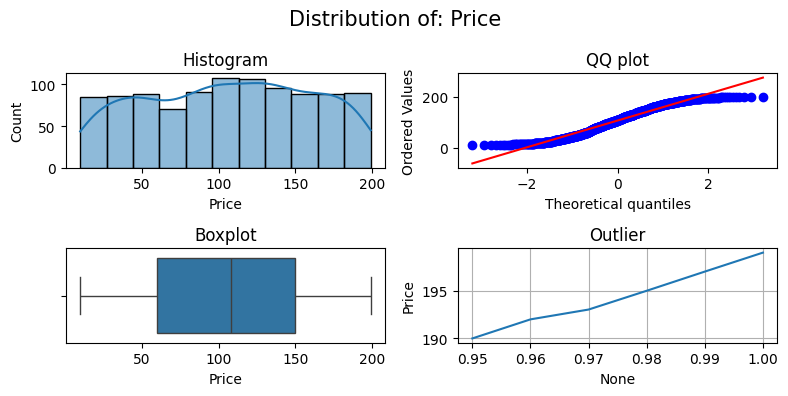

In [14]:
#numerical 
summary_numerical_dist(ds, 'Price', .95, 1)

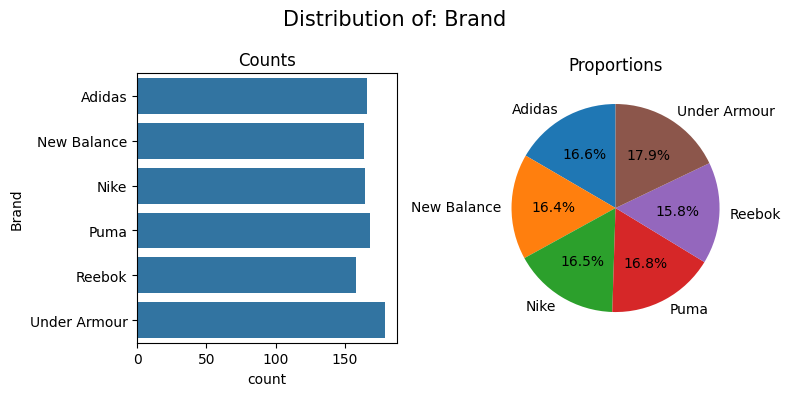

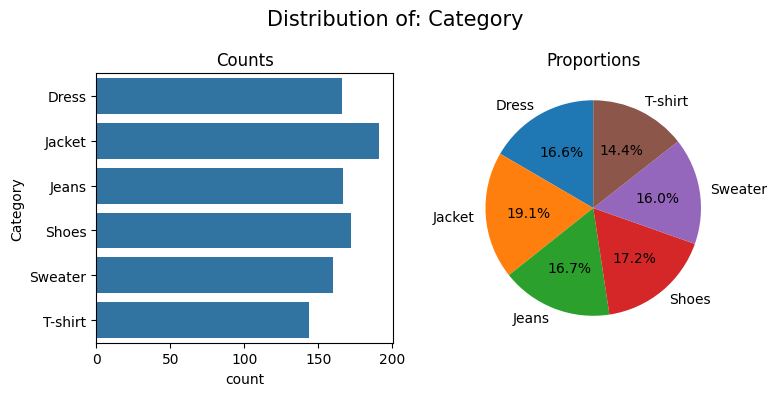

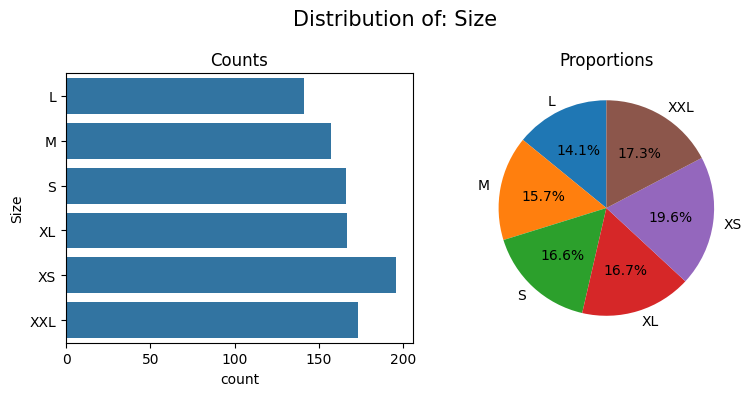

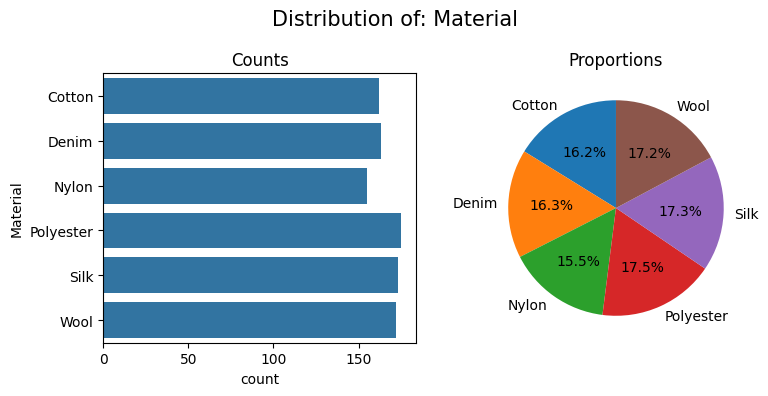

In [16]:
#categorical
summary_categorical_dist(ds, 'Brand')
summary_categorical_dist(ds, 'Category')
summary_categorical_dist(ds, 'Size')
summary_categorical_dist(ds, 'Material')

Realtionship Analysis

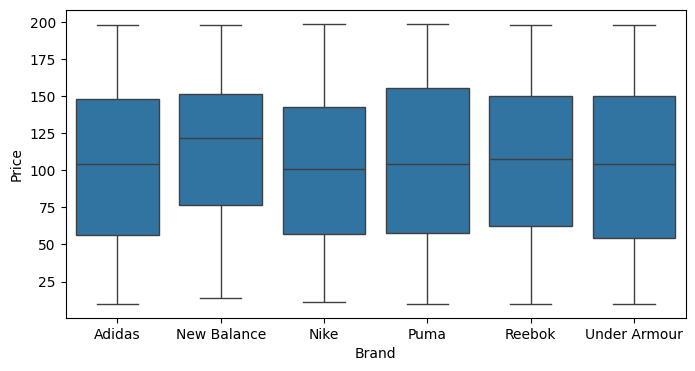

In [17]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.boxplot(data = ds, x = 'Brand', y = 'Price')

plt.show()

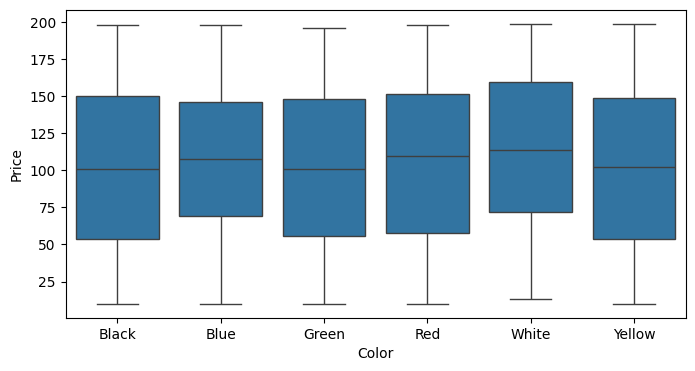

In [18]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.boxplot(data = ds, x = 'Color', y = 'Price')

plt.show()

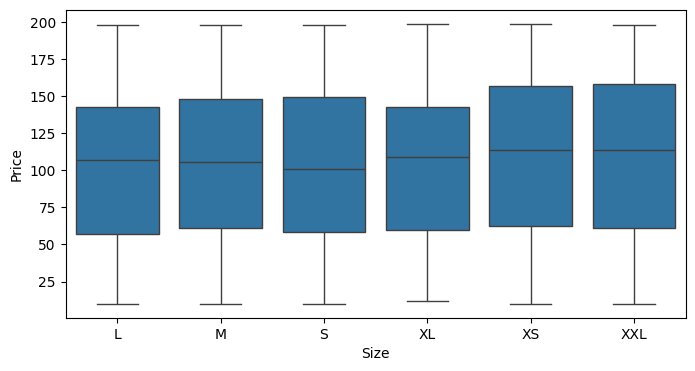

In [19]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.boxplot(data = ds, x = 'Size', y = 'Price')

plt.show()

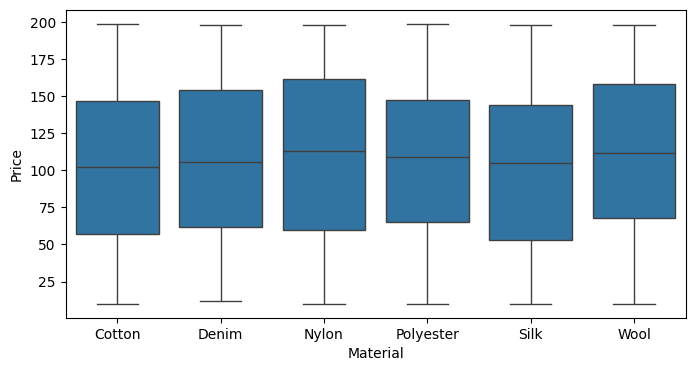

In [20]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.boxplot(data = ds, x = 'Material', y = 'Price')

plt.show()